In [81]:
library(harmony)
library(Seurat)
library(ggplot2)
library(tidyverse)
library(RColorBrewer)

setwd("/media/inspur/AS2150G2/LDK/sclc_metastasis/")
getwd()

[1] "/media/inspur/AS2150G2/LDK/sclc_metastasis"

In [ ]:
readRDS("data_out/3.2.tumorcell.rds")->Lung_tumors
ls()

In [86]:
# check
Lung_tumors
head(Lung_tumors@meta.data)
table(Lung_tumors$orig.ident)

An object of class Seurat 
39839 features across 15024 samples within 1 assay 
Active assay: RNA (39839 features, 0 variable features)

,orig.ident,nCount_RNA,nFeature_RNA,UMAP_1,UMAP_2,Celltype..malignancy.,Celltype..major.lineage.,Celltype..minor.lineage.,seurat_clusters,Sample,⋯,Source,Stage,celltype,percent.mt,RNA_snn_res.0.5,RNA_snn_res.2,new_celltype,sample,percent.HB,RNA_snn_res.0.8
,<chr>,<dbl>,<int>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>
ACTTACTAGAACAACT_LN_11,LN_11,8660,1808,-5.955090,4.8156635,Immune cells,B,B,29,LN_11,⋯,Pleural effusion,Primary,B,0.5773672,16,29,Epithelial,NA,NA,NA
AAGGTTCAGCGAGAAA_LN_11,LN_11,3544,1036,-6.195390,5.1381489,Immune cells,CD4Tconv,CD4Tn,18,LN_11,⋯,Pleural effusion,Primary,CD4Tconv,0.3103837,6,18,Epithelial,NA,NA,NA
ATCATGGTCTAACGGT_EBUS_19,EBUS_19,6750,2185,-4.173180,0.9200947,Immune cells,CD4Tconv,CD4Tn,31,EBUS_19,⋯,mLN,Metastatic,CD4Tconv,2.6370370,17,31,Epithelial,NA,NA,NA
CAGCCGAGTCATCGGC_LN_11,LN_11,3935,1566,-5.665856,4.9351789,Immune cells,CD4Tconv,CD4Tn,18,LN_11,⋯,Pleural effusion,Primary,CD4Tconv,0.2795426,6,18,Epithelial,NA,NA,NA
CCACGGAAGTTATCGC_LN_07,LN_07,5258,1821,-5.763158,3.1899425,Immune cells,CD4Tconv,CD4Tn,18,LN_07,⋯,Pleural effusion,Primary,CD4Tconv,5.8577406,6,18,Epithelial,NA,NA,NA
CTGAAACTCTCAAGTG_LN_04,LN_04,3439,1248,-5.697272,3.6802415,Immune cells,CD4Tconv,CD4Tn,18,LN_04,⋯,nLN,Primary,CD4Tconv,2.5588834,6,18,Epithelial,NA,NA,NA



BRONCHO_11    EBUS_10    EBUS_12    EBUS_13    EBUS_15    EBUS_19    EBUS_51 
       200        406        295        359        215        227       1299 
     LN_01      LN_02      LN_03      LN_04      LN_05      LN_06      LN_07 
         7          6          3          6         16          6         29 
     LN_08      LN_11      LN_12         S1         S2         S3         S4 
        15         13         19       1587       2601         38       2330 
        S5         S6         S7 
        74       4896        377 

In [87]:
c("EBUS_10","BRONCHO_11","EBUS_12","EBUS_13","EBUS_15","EBUS_19","EBUS_51","S1","S2","S3","S4","S5","S6","S7")->select_samples
subset(Lung_tumors,orig.ident %in% select_samples) -> Lung_tumors_subset

In [88]:
library(Seurat)
Lung_tumors_subset <- NormalizeData(Lung_tumors_subset, normalization.method = "LogNormalize", scale.factor = 10000)
Lung_tumors_subset <- FindVariableFeatures(Lung_tumors_subset, selection.method = "vst", nfeatures = 2000)

Lung_tumors_subset <- ScaleData(Lung_tumors_subset, features = VariableFeatures(object = Lung_tumors_subset))

Centering and scaling data matrix



In [89]:
CT<-rep(NA,dim(Lung_tumors_subset)[2])
CT[which(Lung_tumors_subset@meta.data[,"celltype"]=="tumor")]="SCLC"
CT[which(Lung_tumors_subset@meta.data[,"new_celltype"]=="Epithelial")]="NSCLC"
Lung_tumors_subset[["CT"]]<-CT

In [90]:
# check CT
Lung_tumors_subset
table(Lung_tumors_subset$orig.ident)
table(Lung_tumors_subset$CT)

An object of class Seurat 
39839 features across 14904 samples within 1 assay 
Active assay: RNA (39839 features, 2000 variable features)


BRONCHO_11    EBUS_10    EBUS_12    EBUS_13    EBUS_15    EBUS_19    EBUS_51 
       200        406        295        359        215        227       1299 
        S1         S2         S3         S4         S5         S6         S7 
      1587       2601         38       2330         74       4896        377 


NSCLC  SCLC 
 3001 11903 

In [91]:
Lung_tumors_subset <- RunPCA(Lung_tumors_subset, npcs = 50, verbose = FALSE, features = VariableFeatures(object = Lung_tumors_subset))
library(harmony)
Lung_tumors_subset <- RunHarmony(Lung_tumors_subset, c("orig.ident"))
Lung_tumors_subset <- RunUMAP(Lung_tumors_subset, umap.method = 'umap-learn',reduction = "harmony", dims = 1:50, metric="correlation",random.seed=10)

Harmony 1/10

Harmony 2/10

Harmony 3/10

Harmony 4/10

Harmony 5/10

Harmony converged after 5 iterations

Warning message:
“Invalid name supplied, making object name syntactically valid. New object name is Seurat..ProjectDim.RNA.harmony; see ?make.names for more details on syntax validity”
Warning message:
“The following arguments are not used: random.seed”


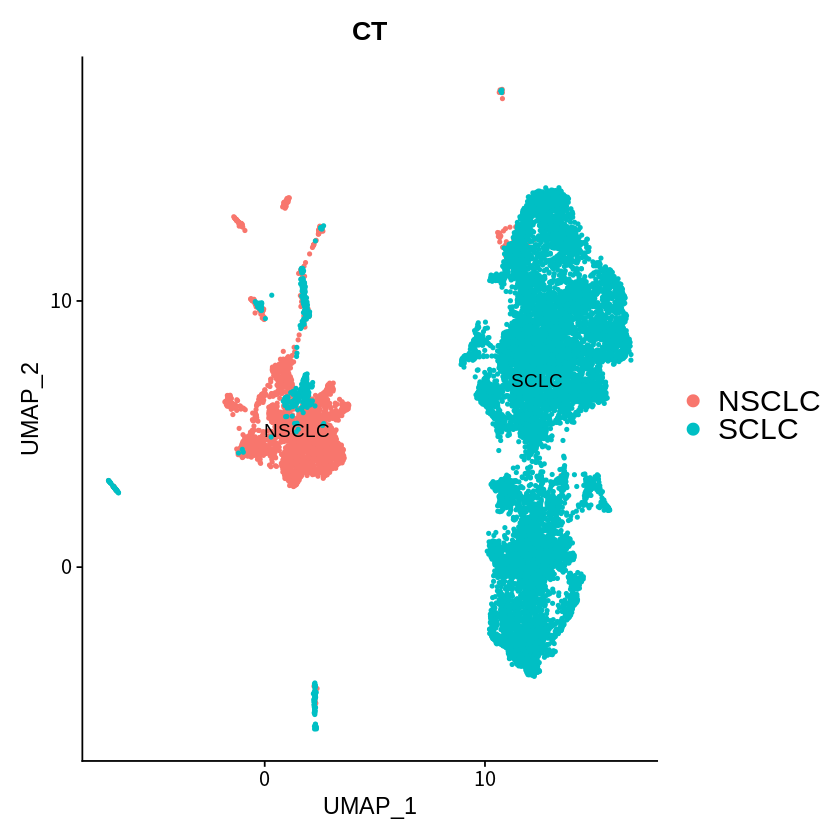

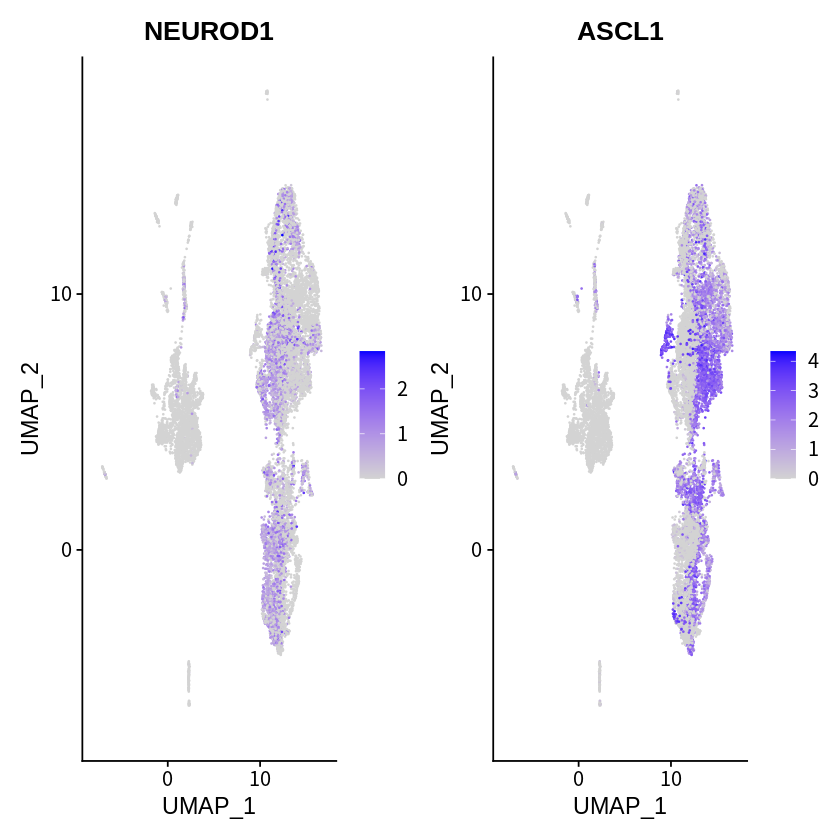

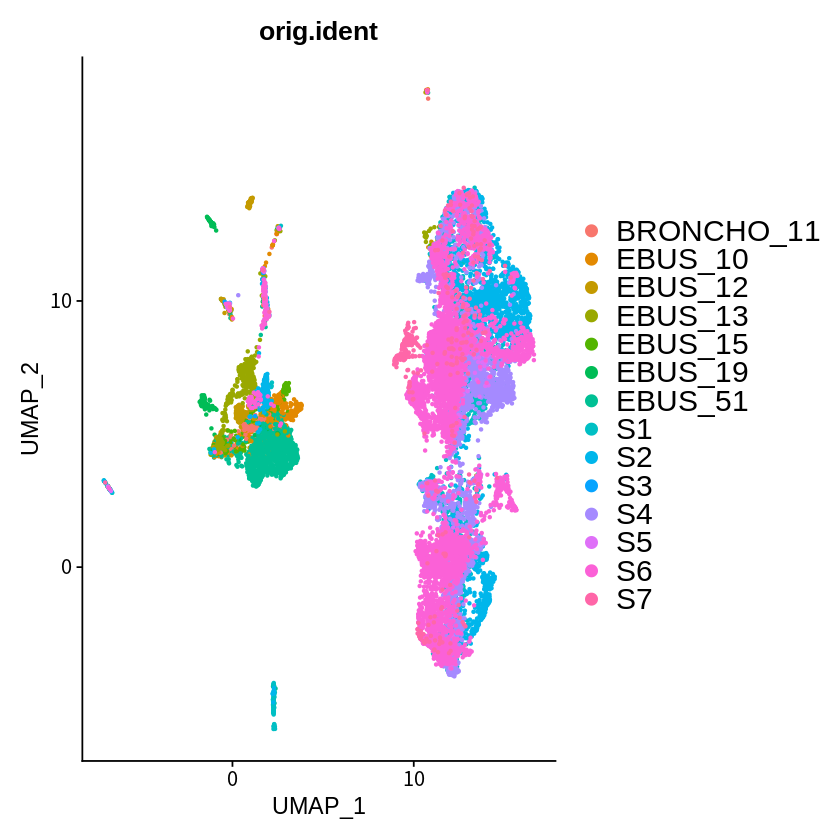

In [92]:
DimPlot(Lung_tumors_subset, reduction = "umap",label=T,group="CT",pt.size = 0.8) + theme(legend.text=element_text(size=18))
FeaturePlot(Lung_tumors_subset,c("NEUROD1","ASCL1"))
DimPlot(Lung_tumors_subset, reduction = "umap",label=F,group="orig.ident",pt.size = 0.6) + theme(legend.text=element_text(size=18))

In [93]:
Lung_tumors_subset <- FindNeighbors(Lung_tumors_subset,  reduction="harmony",dims = 1:50)
Lung_tumors_subset <- FindClusters(Lung_tumors_subset,resolution = 1)

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 14904
Number of edges: 643062

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8593
Number of communities: 29
Elapsed time: 2 seconds


In [94]:
table(Lung_tumors_subset@meta.data[,c("CT","seurat_clusters")])->prop_CT
t(prop_CT)/colSums(prop_CT)-> prop_CT2
CT2<-rep(NA,dim(prop_CT2)[1])
 CT2[which(prop_CT2[,1] >= 0.2 &  prop_CT2[,1]<= 0.8) ]<-"Mixture"
 CT2[ which(prop_CT2[,1]> 0.8) ]<-"NSCLC_dominant"
CT2[which(prop_CT2[,1] < 0.2) ]<-"SCLC_dominant"

In [95]:
names(CT2) <- levels(Lung_tumors_subset)
Lung_tumors_subset <- RenameIdents(Lung_tumors_subset, CT2)
Idents(Lung_tumors_subset) <- factor(Idents(Lung_tumors_subset), levels = c("NSCLC_dominant", "SCLC_dominant", "Mixture"))
Lung_tumors_subset[["CT2"]]<-Idents(Lung_tumors_subset)

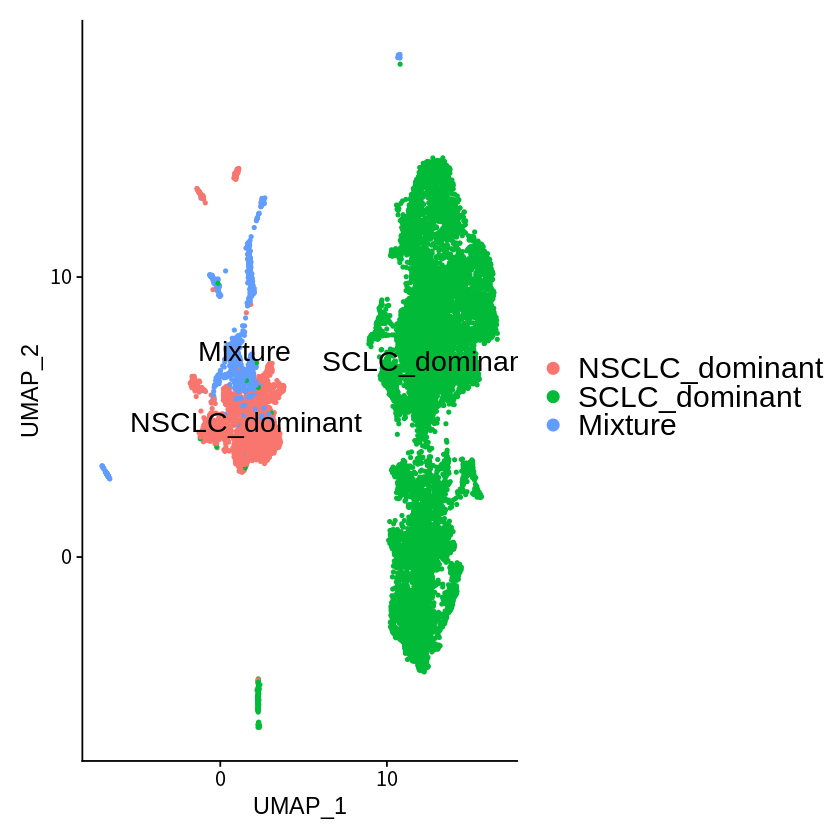

In [104]:
DimPlot(Lung_tumors_subset, reduction = "umap",label=T,pt.size = 0.8, label.size = 6) + theme(legend.text=element_text(size=18))

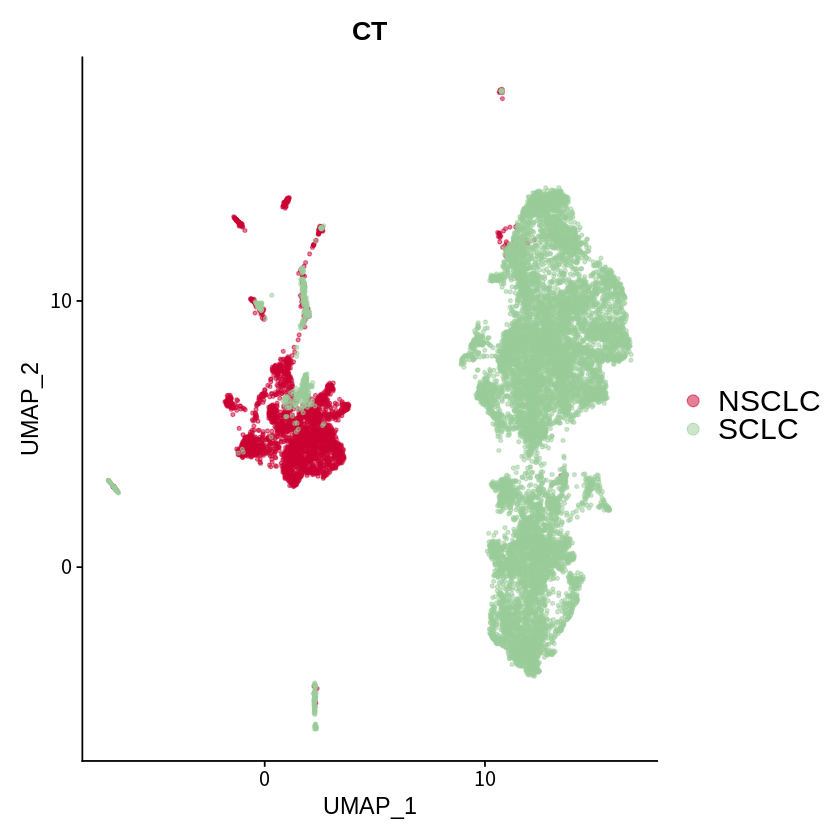

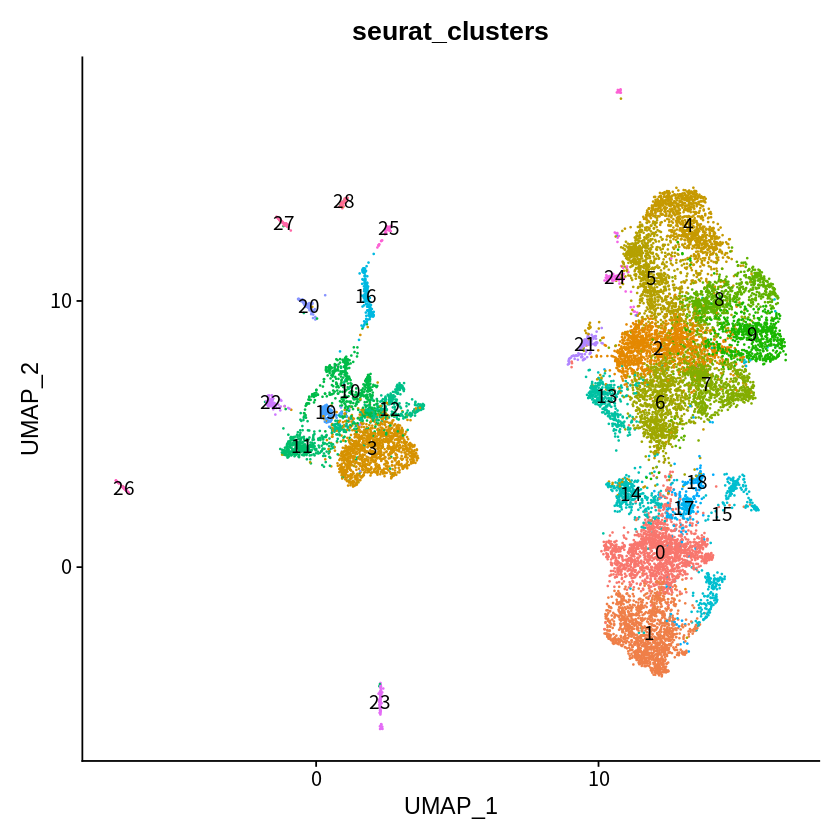

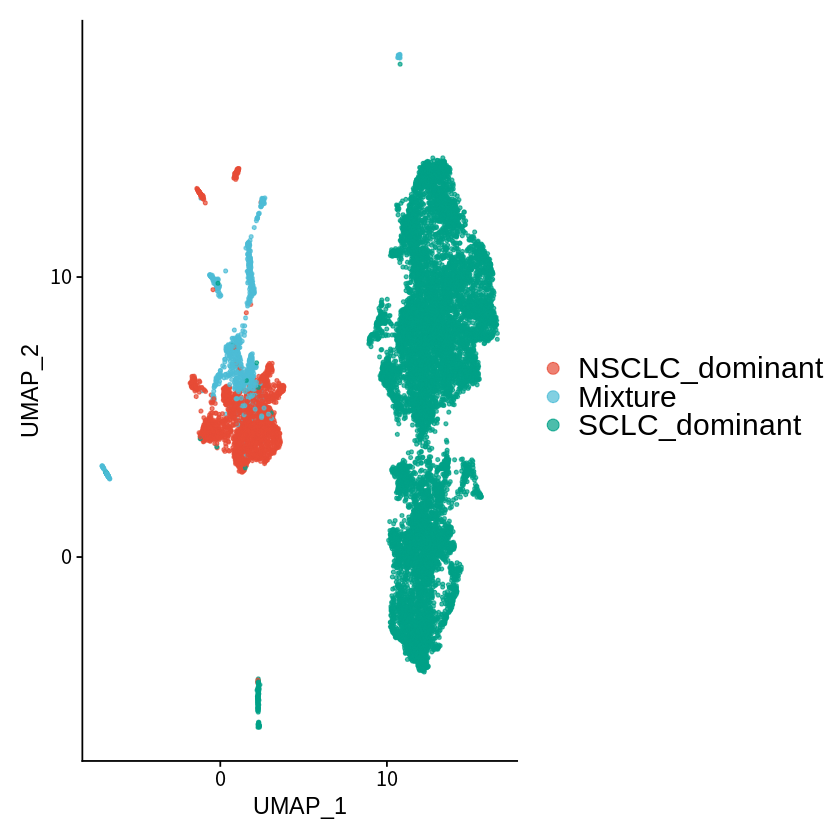

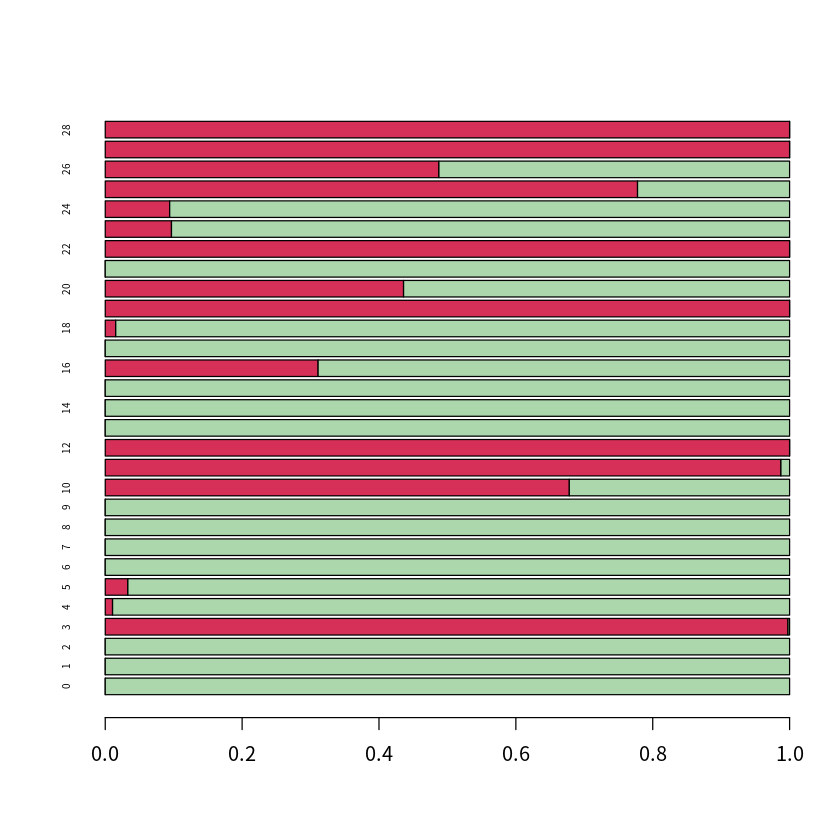

In [103]:
DimPlot(Lung_tumors_subset, reduction = "umap",label=F ,group.by="CT", cols= c("NSCLC"= "#CC003380","SCLC"="#99CC9980"),
       pt.size = 0.8, label.size = 7)  + theme(legend.text=element_text(size=18))
DimPlot(Lung_tumors_subset, reduction = "umap",label=T ,group.by="seurat_clusters") + NoLegend()
DimPlot(Lung_tumors_subset, reduction = "umap",label=F ,cols= c("NSCLC_dominant"= "#E64B35B2","Mixture"="#4DBBD5B2","SCLC_dominant"="#00A087B2"), 
        pt.size = 0.8, label.size = 5)  + theme(legend.text=element_text(size=18))
barplot(t(prop_CT2),col=c("NSCLC"= "#CC0033D0","SCLC"="#99CC99D0"),horiz=T,cex.names=0.5)

## GSEA analysis 

In [106]:
# check 
head(Lung_tumors_subset@meta.data)
table(Lung_tumors_subset$CT2);table(Idents(Lung_tumors_subset));

,orig.ident,nCount_RNA,nFeature_RNA,UMAP_1,UMAP_2,Celltype..malignancy.,Celltype..major.lineage.,Celltype..minor.lineage.,seurat_clusters,Sample,⋯,percent.mt,RNA_snn_res.0.5,RNA_snn_res.2,new_celltype,sample,percent.HB,RNA_snn_res.0.8,CT,RNA_snn_res.1,CT2
,<chr>,<dbl>,<int>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<fct>,<chr>,⋯,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<fct>,<fct>
ATCATGGTCTAACGGT_EBUS_19,EBUS_19,6750,2185,-4.173180,0.9200947,Immune cells,CD4Tconv,CD4Tn,16,EBUS_19,⋯,2.6370370,17,31,Epithelial,NA,NA,NA,NSCLC,16,Mixture
GTAACTGTCAACACCA_EBUS_13,EBUS_13,4801,1609,-6.306058,3.0271310,Immune cells,CD4Tconv,CD4Tn,16,EBUS_13,⋯,1.6663195,17,31,Epithelial,NA,NA,NA,NSCLC,16,Mixture
ACGATACAGCGTGAGT_EBUS_10,EBUS_10,5514,1641,1.464834,10.2612964,Immune cells,CD8T,CD8Tem,16,EBUS_10,⋯,2.8835691,6,18,Epithelial,NA,NA,NA,NSCLC,16,Mixture
AGCATACGTAAGGGCT_EBUS_13,EBUS_13,4185,1521,1.880717,9.6044065,Immune cells,CD8T,CD8Tem,16,EBUS_13,⋯,2.3894863,17,31,Epithelial,NA,NA,NA,NSCLC,16,Mixture
CACCACTAGAAACCTA_EBUS_10,EBUS_10,27034,3880,-6.553408,-8.4065283,Immune cells,CD8T,CD8Tem,10,EBUS_10,⋯,2.9222461,6,18,Epithelial,NA,NA,NA,NSCLC,10,Mixture
CCAATCCCACATGACT_EBUS_10,EBUS_10,32468,3071,-6.471094,-8.4361704,Immune cells,CD8T,CD8Tem,10,EBUS_10,⋯,0.2494764,6,18,Epithelial,NA,NA,NA,NSCLC,10,Mixture



NSCLC_dominant  SCLC_dominant        Mixture 
          2368          11524           1012 


NSCLC_dominant  SCLC_dominant        Mixture 
          2368          11524           1012 

In [107]:
# DEGs between Mixture-  and SCLC_dominant-tumor cells
# ==========================
Mixture_SCLC_dominant.markers <- FindMarkers(Lung_tumors_subset, only.pos = F, 
                            ident.1="Mixture",ident.2="SCLC_dominant",
                            min.pct = 0.01, logfc.threshold = 0.01)
# write.csv(Mixture_SCLC_dominant.markers, file="table_out/3.3_Mixture_SCLC_dominant.markers.csv",quote=F)

In [108]:
# DEGs between Mixture-  and NSCLC_dominant-tumor cells
# ==========================
Mixture_NSCLC_dominant.markers <- FindMarkers(Lung_tumors_subset, only.pos = F, 
                            ident.1="Mixture",ident.2="NSCLC_dominant",
                            min.pct = 0.01, logfc.threshold = 0.01)
# write.csv(Mixture_NSCLC_dominant.markers, file="table_out/3.3_Mixture_NSCLC_dominant.markers.csv",quote=F)

In [109]:
# DEGs between NSCLC_dominant-  and SCLC_dominant- tumor cells
# ==========================
NSCLC_dominant_SCLC_dominant.markers <- FindMarkers(Lung_tumors_subset, only.pos = F, 
                            ident.1="NSCLC_dominant",ident.2="SCLC_dominant",
                            min.pct = 0.01, logfc.threshold = 0.01)
# write.csv(NSCLC_dominant_SCLC_dominant.markers, file="table_out/3.3_NSCLC_dominant_SCLC_dominant.markers.csv",quote=F)

In [112]:
# check 
dim(Mixture_SCLC_dominant.markers);head(Mixture_SCLC_dominant.markers)
dim(Mixture_NSCLC_dominant.markers);head(Mixture_NSCLC_dominant.markers)
dim(NSCLC_dominant_SCLC_dominant.markers);head(NSCLC_dominant_SCLC_dominant.markers)


[1] 16501     5

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
A2M,0,0.7031035,0.166,0.001,0
ABCF2,0,0.1614140,0.186,0.002,0
AC004951.6,0,0.1888081,0.183,0.001,0
AC090498.1,0,0.7287791,0.394,0.001,0
AC245100.1,0,0.1221135,0.138,0.000,0
ACAP1,0,0.4567245,0.303,0.010,0


[1] 16160     5

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
NAPSA,1.253910e-295,-2.672088,0.184,0.900,4.995454e-291
KRT7,3.535966e-287,-2.321286,0.312,0.919,1.408694e-282
SFTA2,9.441320e-281,-1.977463,0.148,0.893,3.761327e-276
GPX1,3.536657e-258,-1.608927,0.382,0.941,1.408969e-253
S100A14,1.095026e-254,-1.746619,0.225,0.878,4.362475e-250
ATP5F1E,5.636479e-248,2.718744,0.431,0.003,2.245517e-243


[1] 16855     5

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ABCA4,0,0.2218204,0.231,0.001,0
ABCC3,0,1.2076517,0.727,0.029,0
ABCC6,0,0.2000812,0.253,0.016,0
ABCF2,0,0.2342638,0.310,0.002,0
ABHD11-AS1,0,0.2691531,0.277,0.000,0
ABHD17C,0,0.4142021,0.512,0.152,0


In [122]:
### order genes 
  geneList= NSCLC_dominant_SCLC_dominant.markers$avg_log2FC
  names(geneList)= toupper(rownames(NSCLC_dominant_SCLC_dominant.markers))
  geneList=sort(geneList,decreasing = T)
  head(geneList);length(geneList)


HP  SCGB3A1   S100A9   GNB2L1     CD74    IFI27 
6.841327 5.993889 4.646034 4.462487 4.271257 4.211668

[1] 16855

In [ ]:
  library(ggplot2)
  library(clusterProfiler)
  library(org.Hs.eg.db)
  library(GSEABase)


In [123]:
 compare_pathway <- "data_input/gmtfile/compare_pathway.gmt"
  geneset <- read.gmt(compare_pathway)
  length(unique(geneset$term))

[1] 11

In [124]:
egmt <- GSEA(geneList, TERM2GENE=geneset,
               minGSSize = 5,
               pvalueCutoff = 1,
               pAdjustMethod = "BH",
               verbose=TRUE)

preparing geneSet collections...

GSEA analysis...

Warning message in fgseaMultilevel(...):
“For some pathways, in reality P-values are less than 1e-10. You can set the `eps` argument to zero for better estimation.”
leading edge analysis...

done...



In [125]:
  gsea_results_df <- egmt@result
 # rownames(gsea_results_df);
 # write.csv(gsea_results_df,file = 'table_out/3.3.gsea_results_df_NSCLC_dominant_SCLC_dominant.markers.csv')

In [131]:
## plot 
read.csv("table_out/3.3.gsea_results_df_Mixture_SCLC_dominant.markers.csv", row.names = 1) -> m.s
data.frame(m.s[,c("ID","NES","pvalue")],type="Mixure.vs.SCLC")->m.s

read.csv("table_out/3.3.gsea_results_df_Mixture_NSCLC_dominant.markers.csv", row.names = 1) -> m.n
data.frame(m.n[,c("ID","NES","pvalue")],type="Mixure.vs.NSCLC")->m.n

read.csv("table_out/3.3.gsea_results_df_NSCLC_dominant_SCLC_dominant.markers.csv", row.names = 1) -> n.s
data.frame(n.s[,c("ID","NES","pvalue")],type="NSCLC.vs.SCLC")->n.s


In [139]:
ls()

[1] "compare_pathway"                     
 [2] "CT"                                  
 [3] "CT2"                                 
 [4] "egmt"                                
 [5] "geneList"                            
 [6] "geneset"                             
 [7] "gsea_results_df"                     
 [8] "Lung_tumors"                         
 [9] "Lung_tumors_subset"                  
[10] "m.n"                                 
[11] "m.s"                                 
[12] "Mixture_NSCLC_dominant.markers"      
[13] "Mixture_SCLC_dominant.markers"       
[14] "n.s"                                 
[15] "NSCLC_dominant_SCLC_dominant.markers"
[16] "pathway"                             
[17] "pathway2"                            
[18] "prop_CT"                             
[19] "prop_CT2"                            
[20] "select_samples"

In [135]:
data.frame(rbind(m.s,m.n,n.s))->pathway2
# colnames(pathway2)[4]<-"type"

In [156]:
P_val_label=rep(NA,dim(pathway2)[1])
P_val_label[which(pathway2[,"pvalue"]<=0.05)]="P_val <= 0.05"
P_val_label[which(pathway2[,"pvalue"]>0.05)]="P_val > 0.05"
data.frame(pathway2, p.label = P_val_label)->pathway3
pathway3$type <- factor(pathway3$type, levels = c("NSCLC.vs.SCLC","Mixure.vs.NSCLC","Mixure.vs.SCLC"))
pathway3$ID <-factor(pathway3$ID, levels=c("HALLMARK_INTERFERON_GAMMA_RESPONSE","HALLMARK_INTERFERON_ALPHA_RESPONSE","KEGG_ANTIGEN_PROCESSING_AND_PRESENTATION","HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION","HALLMARK_TGF_BETA_SIGNALING","HALLMARK_E2F_TARGETS","KEGG_CELL_CYCLE","HALLMARK_HEDGEHOG_SIGNALING","HALLMARK_NOTCH_SIGNALING","HALLMARK_KRAS_SIGNALING_UP","HALLMARK_KRAS_SIGNALING_DN"))

library(ggplot2)


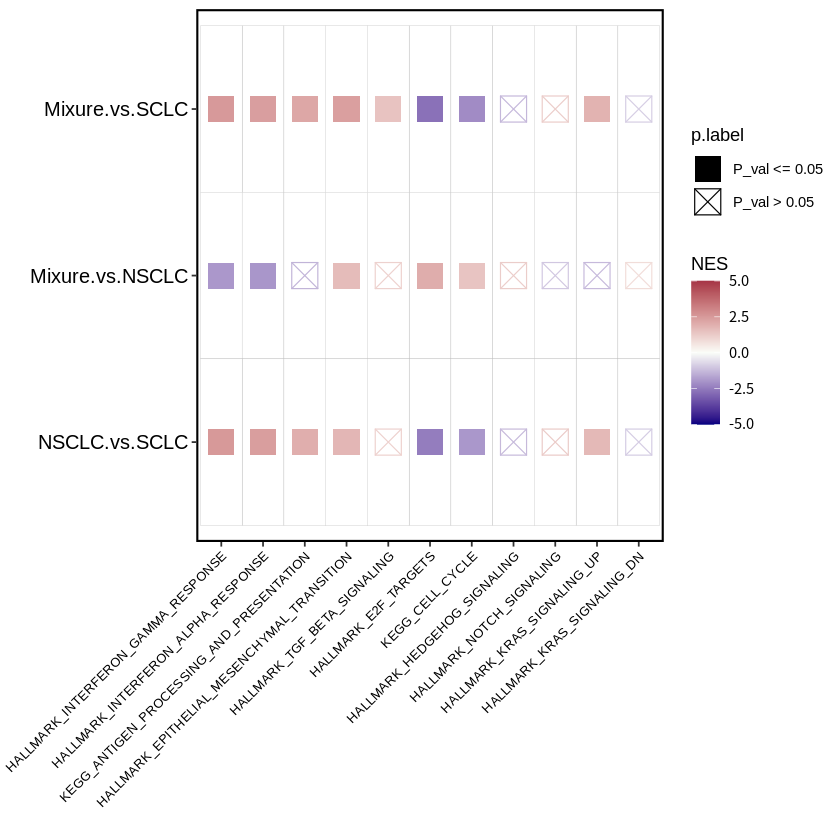

In [158]:
g = ggplot(data = pathway3, aes(x = ID, y = type, col=NES)) +
 ## to get the rect filled 
    geom_tile(col="grey", fill="white") + geom_point(aes(shape = p.label), size = 7) + 
     scale_color_gradient2(mid="#FBFEF9",low="navy",high="#A63446", limits=c(-5,5)) +
     xlab('')+ylab('')+scale_shape_manual(values = c('P_val <= 0.05'=15, 'P_val > 0.05'=7))+
#     geom_hline(yintercept = c(8.5, 13.5, 18.5), linetype = 'longdash')+
    theme_bw()+theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
                           panel.border = element_rect(colour = "black", fill=NA, size=1.2),
                     axis.text.x=element_text(angle = 45, hjust = 1, vjust = 1, size=8, colour = "black"),
         axis.text.y=element_text(size=12, colour = "black"))

g

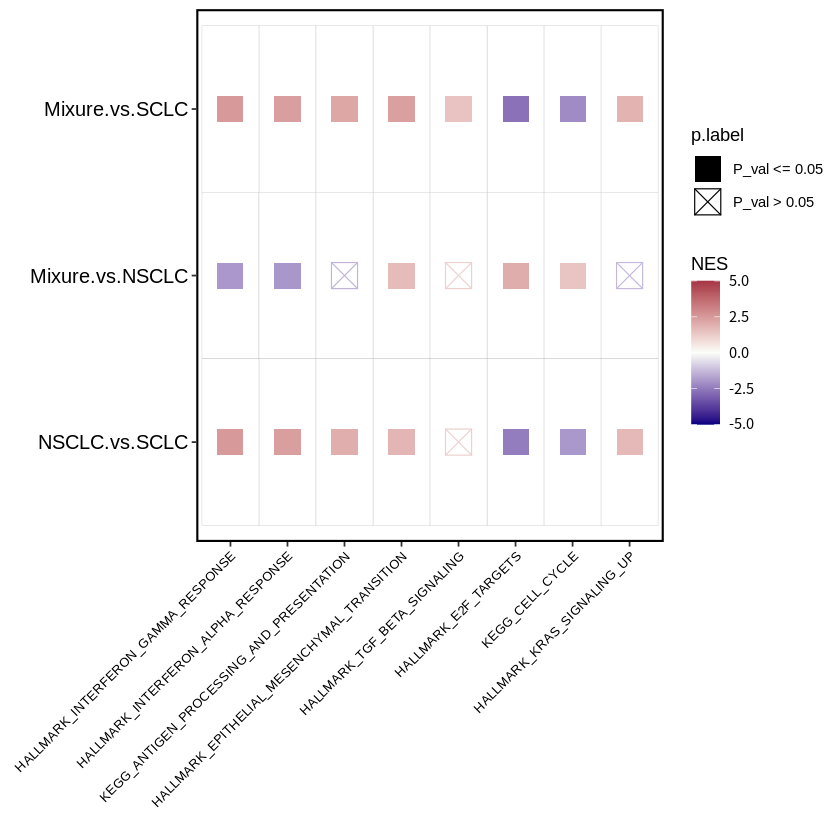

In [181]:
pathway3_sub <- pathway3[setdiff(rownames(pathway3), c("HALLMARK_HEDGEHOG_SIGNALING", "HALLMARK_NOTCH_SIGNALING", "HALLMARK_KRAS_SIGNALING_DN",
                                                      "HALLMARK_HEDGEHOG_SIGNALING1", "HALLMARK_NOTCH_SIGNALING1", "HALLMARK_KRAS_SIGNALING_DN1",
                                                      "HALLMARK_HEDGEHOG_SIGNALING2", "HALLMARK_NOTCH_SIGNALING2", "HALLMARK_KRAS_SIGNALING_DN2")),]
g = ggplot(data = pathway3_sub, aes(x = ID, y = type, col=NES)) +
 ## to get the rect filled 
    geom_tile(col="grey", fill="white") + geom_point(aes(shape = p.label), size = 7) + 
     scale_color_gradient2(mid="#FBFEF9",low="navy",high="#A63446", limits=c(-5,5)) +
     xlab('')+ylab('')+scale_shape_manual(values = c('P_val <= 0.05'=15, 'P_val > 0.05'=7))+
#     geom_hline(yintercept = c(8.5, 13.5, 18.5), linetype = 'longdash')+
    theme_bw()+theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
                           panel.border = element_rect(colour = "black", fill=NA, size=1.2),
                     axis.text.x=element_text(angle = 45, hjust = 1, vjust = 1, size=8, colour = "black"),
         axis.text.y=element_text(size=12, colour = "black"))

g

In [ ]:
# save(Lung_tumors_subset, file = "data_out/3.3.Lung_tumors_subset.rdata")

In [186]:
sessionInfo()

R version 4.1.2 (2021-11-01)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Ubuntu 16.04.7 LTS

Matrix products: default
BLAS/LAPACK: /home/inspur/miniconda3/envs/sclc_ldk/lib/libopenblasp-r0.3.18.so

locale:
 [1] LC_CTYPE=zh_CN.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=zh_CN.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=zh_CN.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=zh_CN.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=zh_CN.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats4    stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
 [1] GSEABase_1.56.0       graph_1.72.0          annotate_1.72.0      
 [4] XML_3.99-0.8          org.Hs.eg.db_3.14.0   AnnotationDbi_1.56.2 
 [7] IRanges_2.28.0        S4Vectors_0.32.3      Biobase_2.54.0       
[10] BiocGenerics_0.40.0   clusterProfiler_4.2.1 RColorBrewer_1.1-2   
[13]